In [1]:
# all import statements 

from functools import partial
from operator import methodcaller
import logging
logger = logging.getLogger()
#logger.setLevel('DEBUG')
import yaml
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter, ScalarFormatter
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 20)

from bs4 import BeautifulSoup
from collections import Counter
from concurrent import futures
from itertools import combinations, chain, permutations, product
import json
import networkx as nx
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.preprocessing import normalize

from urllib.parse import urlparse
import datetime

# importing own modules
import comment_thread as ct
import author_network as an
import multi_comment_thread as mct
from notebook_helper.process_data import *
from notebook_helper.access_funs import *
from plotting.threads import *
from plotting.network import *
from plotting.overview import *
from plotting.heatmap import *


SBSTYLE = an.SETTINGS['style']

In [2]:
# creating the DataFrames for all projects
start = datetime.datetime.now()
print("starting at: ", start)
PM1_FRAME = process_polymath("Polymath 1", split=True)
stop = datetime.datetime.now()
print("Polymath 1 processed in ", stop-start)
start = datetime.datetime.now()
PM2_FRAME = process_polymath("Polymath 2", split=True)
stop = datetime.datetime.now()
print("Polymath 2 processed in ", stop-start)
start = datetime.datetime.now()
PM3_FRAME = process_polymath("Polymath 3", split=True)
stop = datetime.datetime.now()
print("Polymath 3 processed in ", stop-start)
start = datetime.datetime.now()
PM4_FRAME = process_polymath("Polymath 4", split=True)
stop = datetime.datetime.now()
print("Polymath 4 processed in ", stop-start)
start = datetime.datetime.now()
PM5_FRAME = process_polymath("Polymath 5", split=True)
stop = datetime.datetime.now()
print("Polymath 5 processed in ", stop-start)
start = datetime.datetime.now()
PM6_FRAME = process_polymath("Polymath 6", split=True)
stop = datetime.datetime.now()
print("Polymath 6 processed in ", stop-start)
start = datetime.datetime.now()
PM7_FRAME = process_polymath("Polymath 7", split=True)
stop = datetime.datetime.now()
print("Polymath 7 processed in ", stop-start)
start = datetime.datetime.now()
PM8_FRAME = process_polymath("Polymath 8", split=True)
stop = datetime.datetime.now()
print("Polymath 8 processed in ", stop-start)
start = datetime.datetime.now()
PM9_FRAME = process_polymath("Polymath 9", split=True)
stop = datetime.datetime.now()
print("Polymath 9 processed in ", stop-start)
start = datetime.datetime.now()
PM10_FRAME = process_polymath("Polymath 10", split=True)
stop = datetime.datetime.now()
print("Polymath 10 processed in ", stop-start)
start = datetime.datetime.now()
PM11_FRAME = process_polymath("Polymath 11", split=True)
stop = datetime.datetime.now()
print("Polymath 11 processed in ", stop-start)
print("completed at: ", datetime.datetime.now())

starting at:  2017-02-20 16:31:42.448239
Polymath 1 processed in  0:00:57.249155
Polymath 2 processed in  0:00:00.915820


Polymath 3 processed in  0:00:18.520547
Polymath 4 processed in  0:00:13.058700


Polymath 5 processed in  0:02:21.712145
Polymath 6 processed in  0:00:02.835102


Polymath 7 processed in  0:00:15.600791
Polymath 8 processed in  0:03:53.872706
Polymath 9 processed in  0:00:08.681413


Polymath 10 processed in  0:00:22.595984
Polymath 11 processed in  0:00:20.553379
completed at:  2017-02-20 16:40:38.048624


In [3]:
# merging all DataFrames in a single frame
POLYMATHS = [PM1_FRAME, PM2_FRAME, PM3_FRAME, PM4_FRAME, PM5_FRAME, PM6_FRAME, PM7_FRAME, PM8_FRAME, PM9_FRAME, PM10_FRAME, PM11_FRAME]
COL_ORDER = PM1_FRAME.columns.tolist()
PM_FRAME = pd.concat(POLYMATHS)[COL_ORDER]

In [4]:
# set of all authors as global variable
ALL_AUTHORS = set.union(*PM_FRAME['all threads', 'authors'].tolist())

**To Do: add feature to get first and last from info in PM_FRAME**

**should move elsewhere -- this is now already mentioned in item (3) above, and should go to dedicated section**

Notwithstanding our reliance on online research methods, our final intent is still to contribute to the philosophy of mathematical practices by adopting a sociological approach and relying on empirical data. This approach is not without risks.

First, we still need to ensure that the perspective we adopt allows us to answer the questions **to be completed**

+ Kuhn's point (used by Gilies) that if there's a community, there's a sociology. This explains why sociological methods can be used to look at Polymath, but not yet how this can contribute to the philosophy of mathematics.


Second, there is a kind of paradox **to be completed**

Related to this paradox: what does the social epistemology of mathematics tell us about its epistemology and practice, if the standard practice doesn't have an equally substantive social component? Can looking at the social aspects also inform us about the individual aspects? perhaps because the single-agent case can be seen as a special case of the multi-agent case.

In [5]:
# assembling data for overview
THE_DATA, _ = get_last(PM_FRAME, None)
THE_DATA.index= THE_DATA.index.droplevel(1)
THE_DATA.columns = THE_DATA.columns.swaplevel()
AUTHOR_DATA = THE_DATA['authors (accumulated)'].copy()
COMMENT_DATA = THE_DATA['number of comments (accumulated)', 'all threads'].copy()
AUTHOR_DATA['authors only active in research threads'] = AUTHOR_DATA['research threads'] - AUTHOR_DATA['discussion threads']
AUTHOR_DATA['authors only active in "discussion" threads'] = AUTHOR_DATA['discussion threads'] - AUTHOR_DATA['research threads']
AUTHOR_DATA['authors active in both types of threads'] = AUTHOR_DATA['all threads'] - AUTHOR_DATA['authors only active in research threads'] - AUTHOR_DATA['authors only active in "discussion" threads']
for project in AUTHOR_DATA.index:
    if pd.isnull(AUTHOR_DATA.loc[project]['authors only active in research threads']):
        AUTHOR_DATA.loc[project]['authors only active in research threads'] = AUTHOR_DATA.loc[project]['all threads']
AUTHOR_DATA = AUTHOR_DATA[['authors only active in research threads', 'authors active in both types of threads', 'authors only active in "discussion" threads']]
AUTHOR_DATA = AUTHOR_DATA.applymap(lambda set: len(set) if pd.notnull(set) else 0)

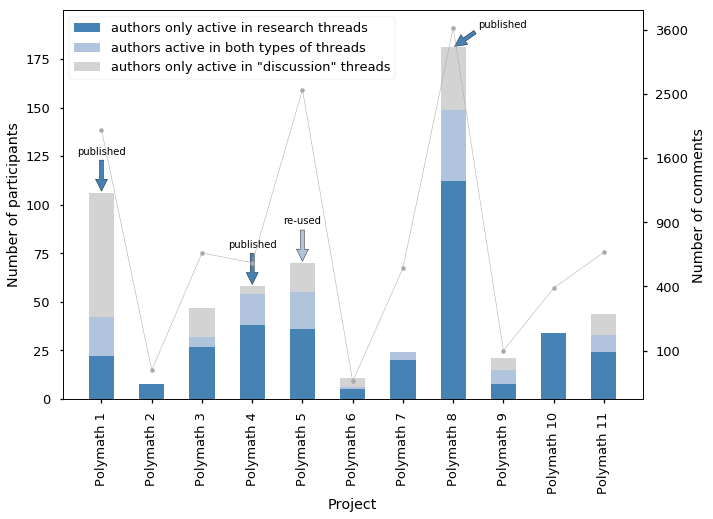

In [6]:
# create overview-plot for all projects
matplotlib.style.use(SBSTYLE)
axes = plt.subplot()
AUTHOR_DATA.plot(kind='bar', stacked=True, color=['steelblue', 'lightsteelblue', 'lightgrey'], ax=axes)
#,title="Overview of all projects")
axes.xaxis.set_ticks_position('bottom')
axes.set_ylabel("Number of participants")
axes.set_ylim(0,200)
axes.set_yticks(range(0,200,25))
y_values = AUTHOR_DATA.sum(axis=1).loc[["Polymath {}".format(i) for i in [1, 4, 5, 8]]].values
axes.annotate('published', xy=(0, y_values[0]), xytext=(0, y_values[0] + 20),
            arrowprops=dict(facecolor='steelblue', shrink=0.05),
              horizontalalignment='center'
            )
axes.annotate('published', xy=(3, y_values[1]), xytext=(3, y_values[1] + 20),
            arrowprops=dict(facecolor='steelblue', shrink=0.05),
              horizontalalignment='center'
            )
axes.annotate('re-used', xy=(4, y_values[2]), xytext=(4, y_values[2] + 20),
            arrowprops=dict(facecolor='lightsteelblue', shrink=0.05),
              horizontalalignment='center'
            )
axes.annotate('published', xy=(7, y_values[3]), xytext=(7.5, y_values[3] + 10),
            arrowprops=dict(facecolor='steelblue', shrink=0.05),
            )
COMMENT_DATA = np.sqrt(COMMENT_DATA)
axes2 = axes.twinx()
axes2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:"{:0.0f}".format(np.square(x))))
axes2.set_ylabel("Number of comments")
_ = axes2.plot(axes.get_xticks(), COMMENT_DATA.values,
                   linestyle='-', marker='.', linewidth=.5,
                   color='darkgrey')
plt.savefig("FIGS/overview_bar.png")

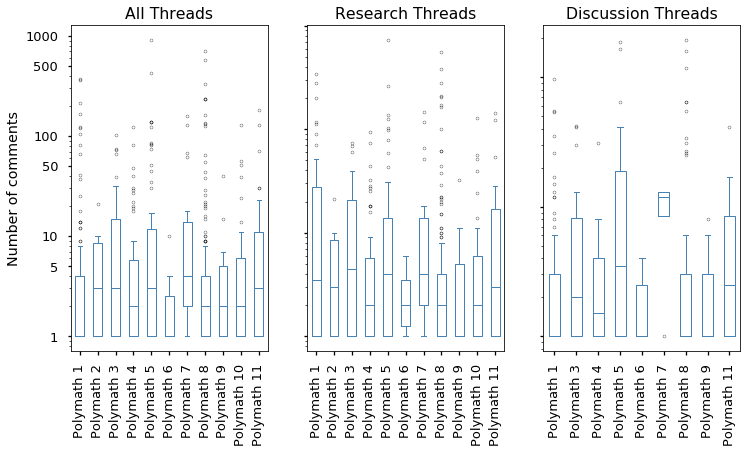

In [7]:
# create box-plot of commenting-activity
commenting_author_project_r = get_last(PM_FRAME, "research threads")[0]['research threads', 'comment_counter (accumulated)']
commenting_author_project_r.index = commenting_author_project_r.index.droplevel(1)
commenting_author_project_d = get_last(PM_FRAME, "discussion threads")[0]['discussion threads', 'comment_counter (accumulated)']
commenting_author_project_d.index = commenting_author_project_d.index.droplevel(1)
commenting_author_project_a = get_last(PM_FRAME, "all threads")[0]['all threads', 'comment_counter (accumulated)']
commenting_author_project_a.index = commenting_author_project_a.index.droplevel(1)
commenting_author_project_r = commenting_author_project_r.apply(Series).T
commenting_author_project_d = commenting_author_project_d.apply(Series).T
commenting_author_project_a = commenting_author_project_a.apply(Series).T
fig, axes = plt.subplots(1,3, figsize=(12,6))
mpl.rc("lines", markeredgewidth=0.3)
commenting_author_project_a.apply(Series).plot(kind='box', ax=axes[0],
                                               grid=False, logy=True, sym='.',
                                               rot=90, return_type='axes',
                                               color='steelblue', 
                                               title = "All Threads")
axes[0].yaxis.set_major_formatter(ScalarFormatter())
axes[0].yaxis.set_ticks([1, 5, 10, 50, 100, 500, 1000])
axes[0].yaxis.set_ticklabels([1, 5, 10, 50, 100, 500, 1000])
axes[0].set_ylabel("Number of comments")
commenting_author_project_r.apply(Series).plot(kind='box', ax=axes[1],
                                               grid=False, logy=True, sym='.',
                                               rot=90, return_type='axes',
                                               color='steelblue',
                                               title = "Research Threads");
commenting_author_project_d.apply(Series).plot(kind='box', ax=axes[2],
                                               grid=False, logy=True, sym='.',
                                               rot=90, return_type='axes',
                                               color='steelblue',
                                               title = "Discussion Threads");
axes[1].yaxis.set_ticklabels([]);
axes[2].yaxis.set_ticklabels([]);
for i in range(3):
    axes[i].xaxis.set_ticks_position('bottom')
    axes[i].yaxis.set_ticks_position('left')
    #axes[i].set_ylim([0,1000])
plt.savefig("FIGS/overview_box.png")
# resetting mpl to values picked by seaborn.set
mpl.rc("lines", markeredgewidth=0, solid_capstyle="round")

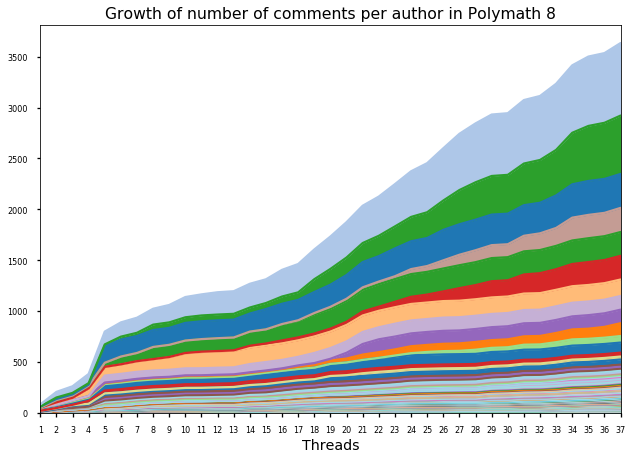

In [8]:
plot_activity_area(PM_FRAME, "Polymath 8", "all threads")

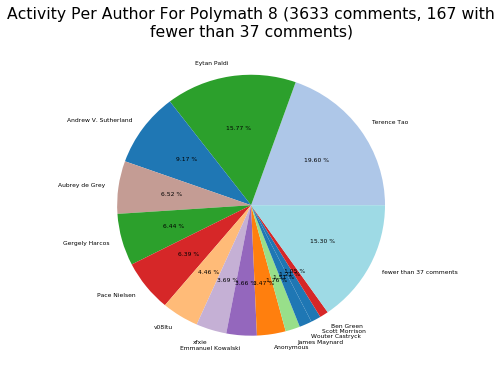

In [9]:
plot_activity_pie(PM_FRAME, "Polymath 8")

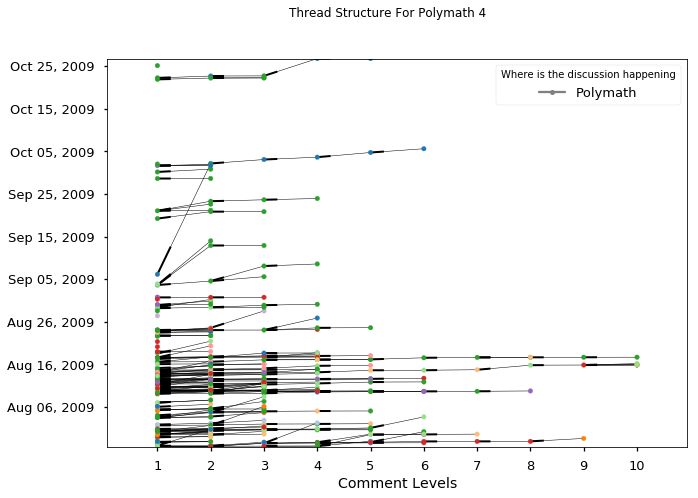

In [10]:
plot_discussion_tree(PM_FRAME, "Polymath 4", stage=3)

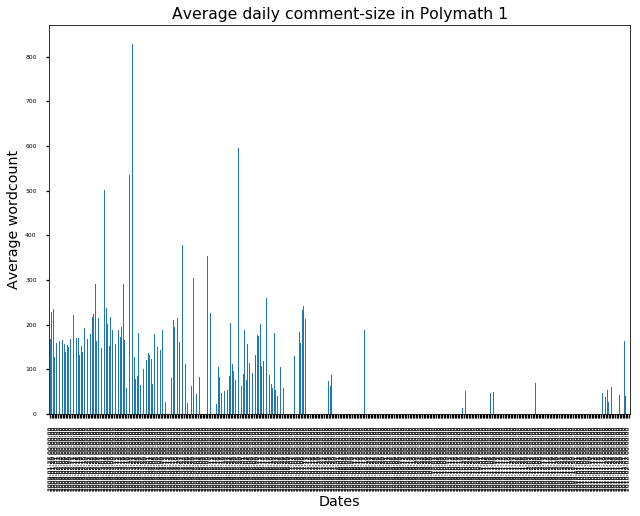

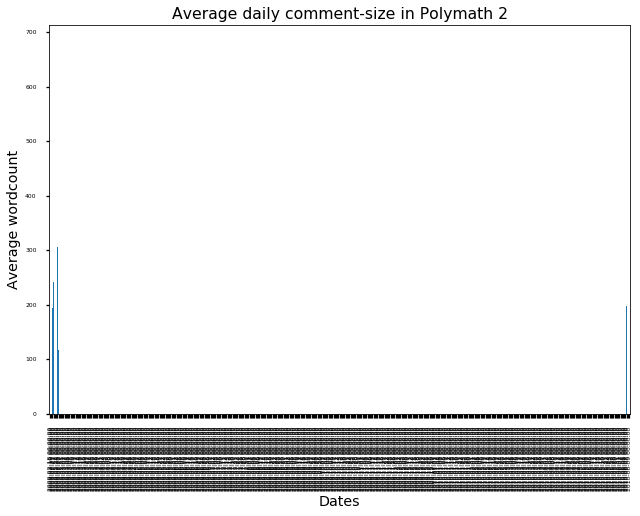

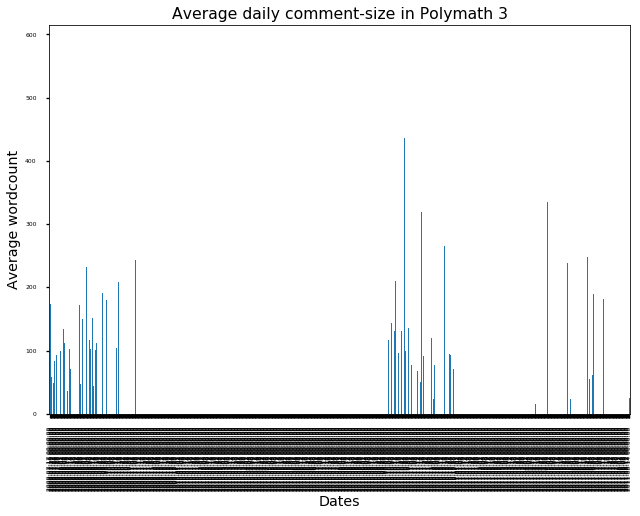

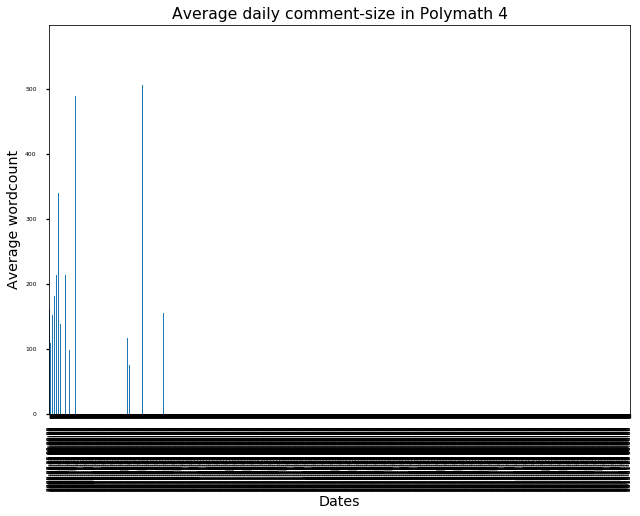

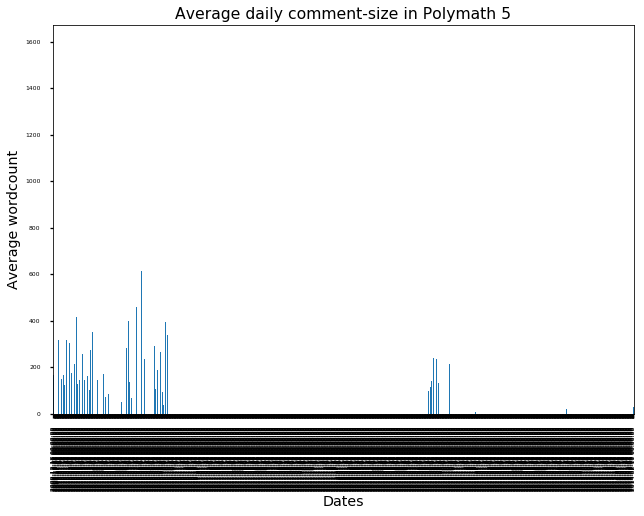

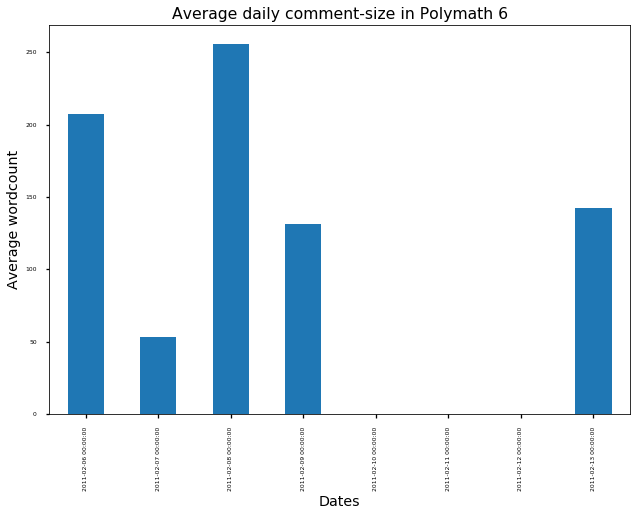

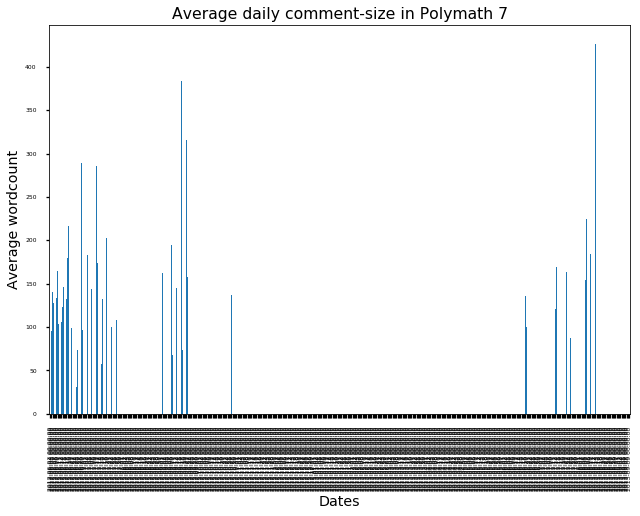

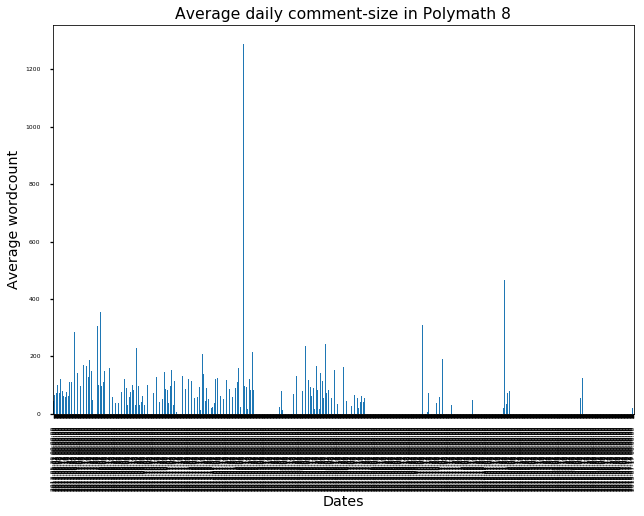

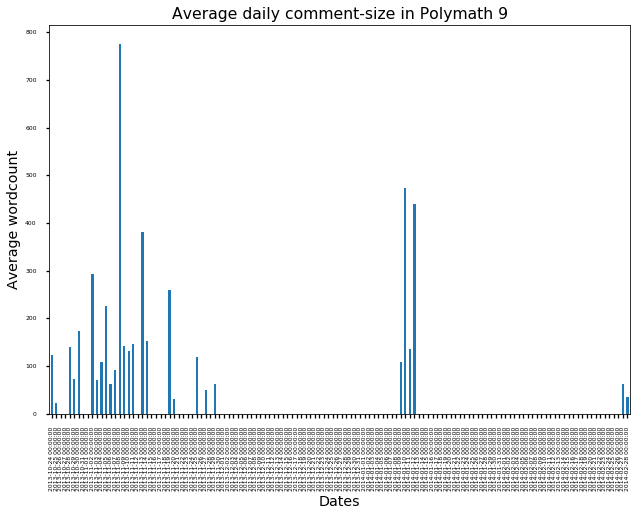

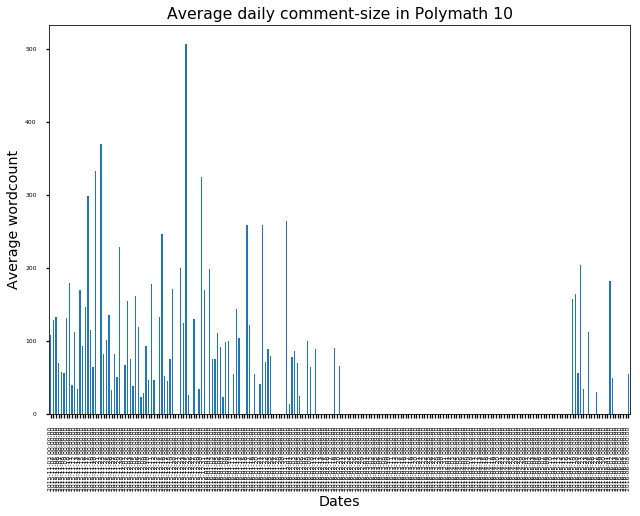

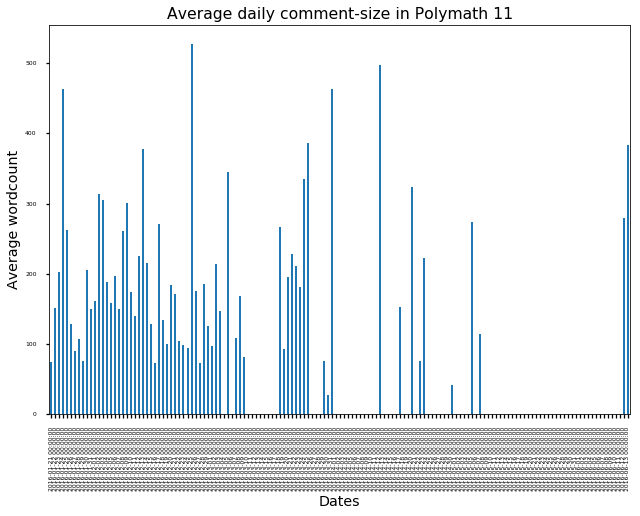

In [11]:
for project in ("Polymath {}".format(i) for i in range(1,12)):
    plot_comment_sizes(PM_FRAME, project)

In [12]:
PM_FRAME['basic', 'post length'].describe()
1582.000000 - 326.000000

1256.0

In [13]:
PM_FRAME['basic', 'post length'][PM_FRAME['basic', 'research']].describe()

count     100.000000
mean     1381.360000
std      1477.348099
min         0.000000
25%       415.000000
50%       921.000000
75%      1924.250000
max      7579.000000
Name: (basic, post length), dtype: float64

In [14]:
PM_FRAME['basic', 'post length'][~PM_FRAME['basic', 'research']].describe()

count      37.000000
mean      890.729730
std      1377.985136
min       129.000000
25%       286.000000
50%       446.000000
75%       809.000000
max      7917.000000
Name: (basic, post length), dtype: float64

In [15]:
PM_FRAME['basic', 'avg length of comments'][PM_FRAME['basic', 'research']].describe()

count    100.000000
mean     156.179539
std       61.742487
min       30.500000
25%      103.325512
50%      147.551600
75%      196.422802
max      302.000000
Name: (basic, avg length of comments), dtype: float64

In [16]:
PM_FRAME['basic', 'avg length of comments'][~PM_FRAME['basic', 'research']].describe()

count     37.000000
mean     112.821945
std       48.471262
min       29.000000
25%       73.500000
50%      112.516129
75%      144.953704
max      211.089552
Name: (basic, avg length of comments), dtype: float64

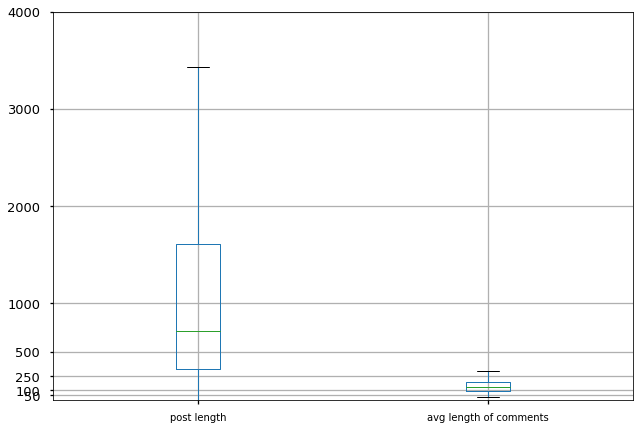

In [17]:
matplotlib.style.use(SBSTYLE)
axes = PM_FRAME['basic'].boxplot(column=['post length', 'avg length of comments'],
                                 grid=True, return_type='axes')
axes.xaxis.set_ticks_position('bottom')
axes.yaxis.set_ticks_position('left')
axes.set_ylim(0, 4000)
axes.set_yticks([50, 100, 250, 500, 1000, 2000, 3000, 4000])
plt.savefig("FIGS/wordcounts_box.png")

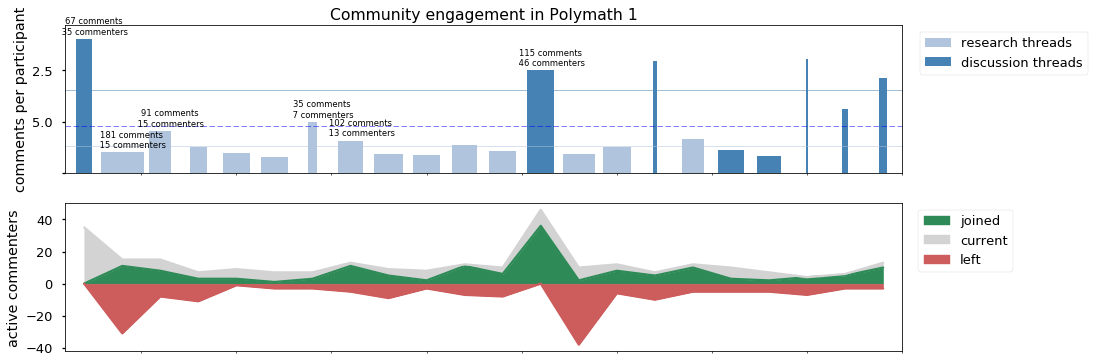

In [18]:
plot_thread_evolution(PM_FRAME, 'Polymath 1', compress=160, sel=[1, 2, 3, 7, 8, 13])

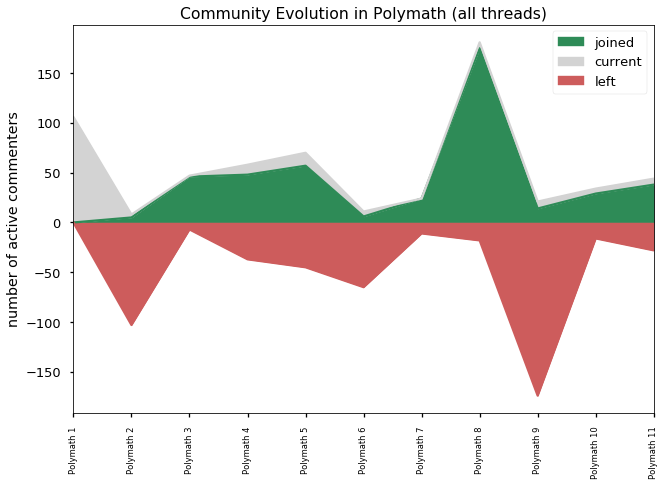

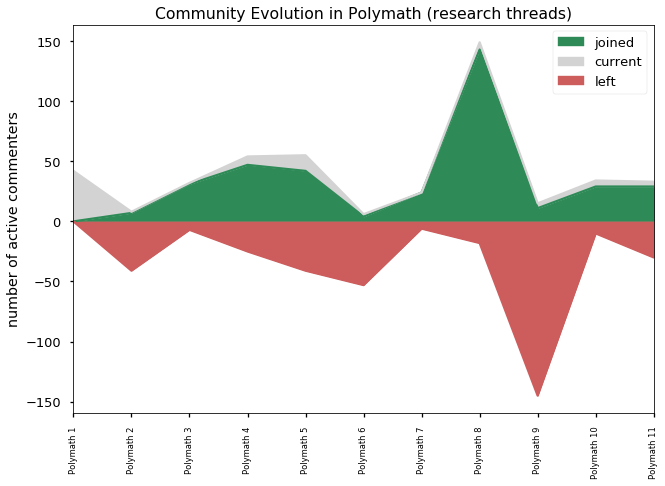

In [19]:
plot_community_evolution(PM_FRAME, 'Polymath', 'all threads')
plot_community_evolution(PM_FRAME, 'Polymath', 'research threads')

If we restrict our attention to participants that were active in at least 2 threads (less than 14% of all participants), we can start to look for patterns in how the core contributor-base evolves. A first purely qualitative representation of who participated to which projects shows both that as a long-term community Polymath is extremely small, and that the basis for the majority of this small core was largely constituted in the early stages of Polymath.

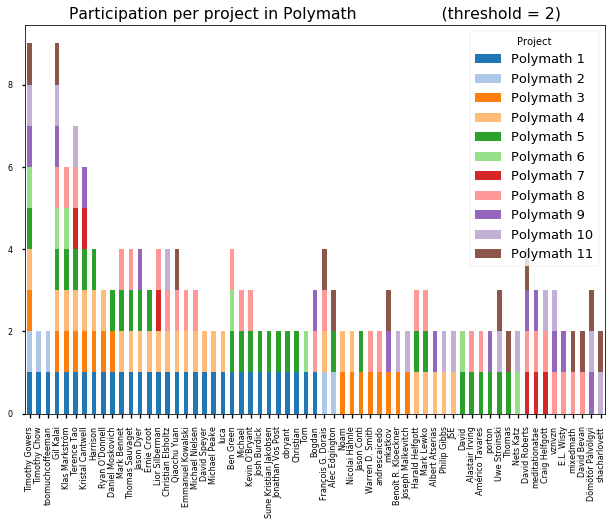

In [20]:
author_project, indices, select_2, title = project_participation_evolution(PM_FRAME, ALL_AUTHORS, research_only=False)
plot_participation_evolution(author_project, indices, select_2, title, fontsize=8)
plt.savefig("FIGS/project_part.png")

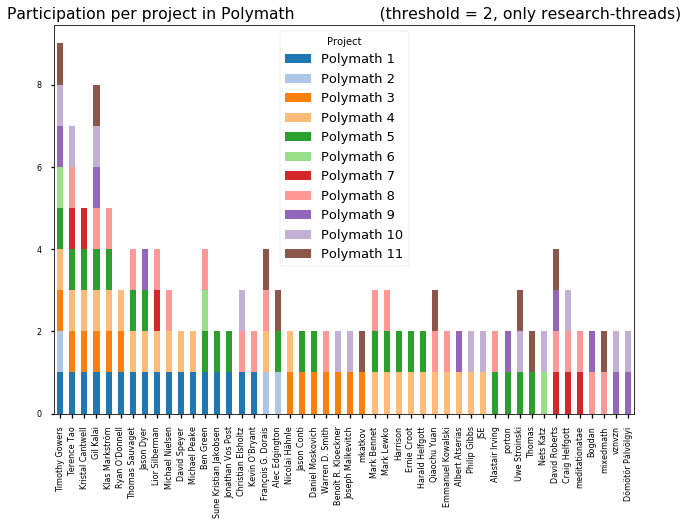

In [21]:
r_author_project, r_indices, r_select_2, title = project_participation_evolution(PM_FRAME, ALL_AUTHORS, research_only=True)
plot_participation_evolution(r_author_project, r_indices, r_select_2, title, fontsize=8)
plt.savefig("FIGS/project_part_r.png")

To refine these insights we considered the number of comments in each project for the same set of participants. Using hierarchical linkage based on the Euclidean distance between vectors (number of comments per project per contributor and vice-versa), we identified participants and projects with similar patterns of participation. The contributors and projects were reordered on the basis of these results to reveal patterns in the heatmap included below.

(Note that a log10-scale is used, which compresses the higher values and improves visibility of small differences in the lower values. The color-scale is chosen such as to improve the visibility of low values.)

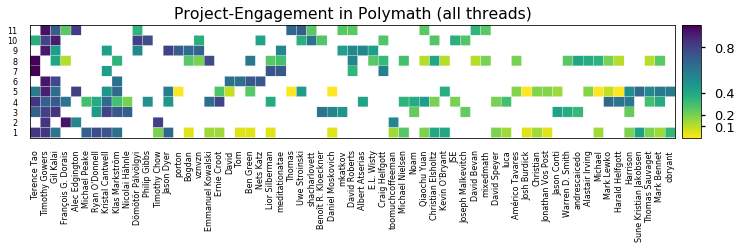

In [22]:
authors_2 = sorted([author for author, bool in select_2.items() if bool])
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2,
                              thread_level=False, cluster_projects=False,
                              binary=False,
                              scale_data=True),
             log=True)
plt.savefig("FIGS/heatmap_a_project.png", bbox_inches='tight')

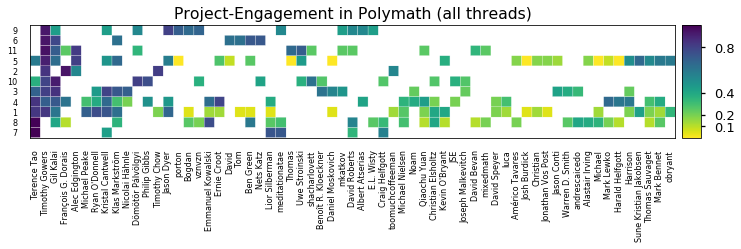

In [23]:
authors_2 = sorted([author for author, bool in select_2.items() if bool])
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2,
                              thread_level=False,
                              binary=False,
                              scale_data=True),
             log=True)

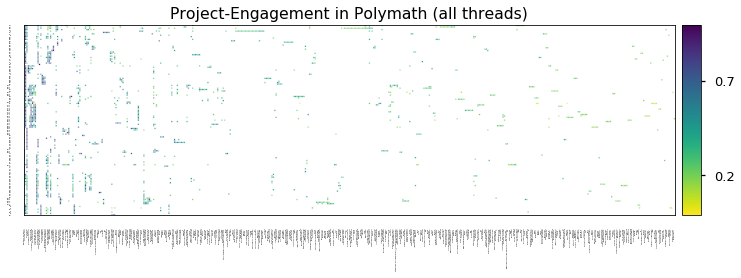

In [53]:
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2,
                              thread_level=True,
                              binary=False,
                              scale_data=True),
             log=True, fontsize=2)

This approach suggests natural grouping of the participants (recall, this is only about a small subset of all participants) based on similarity and with the caveat that with the metrics I used it is inevitable that less active participants are more similar to each other than highly active participants:

+ **Global Leaders (3):** Terence Tao, Timothy Gowers, Gil Kalai
+ **Local Leaders (2):** François G. Dorais, Alex Edgington
+ **Core-participants (18/19):** Peake -> Silberman
+ **Periphery (40/39):** meditationatae -> obryant

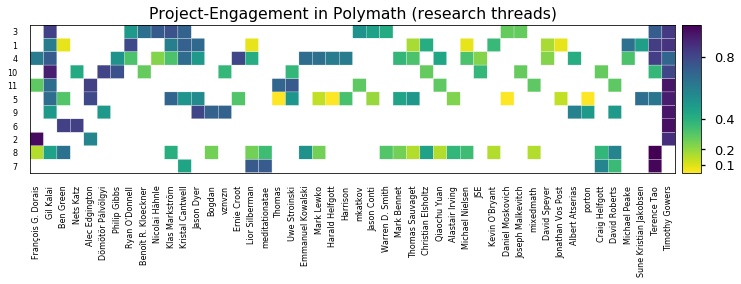

In [24]:
r_authors_2 = sorted([author for author, bool in r_select_2.items() if bool])
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS, authors=r_authors_2, thread_level=False, binary=False, thread_type='research threads', scale_data=True),
            log=True)
plt.savefig("FIGS/heatmap_r_project.png", bbox_inches='tight')

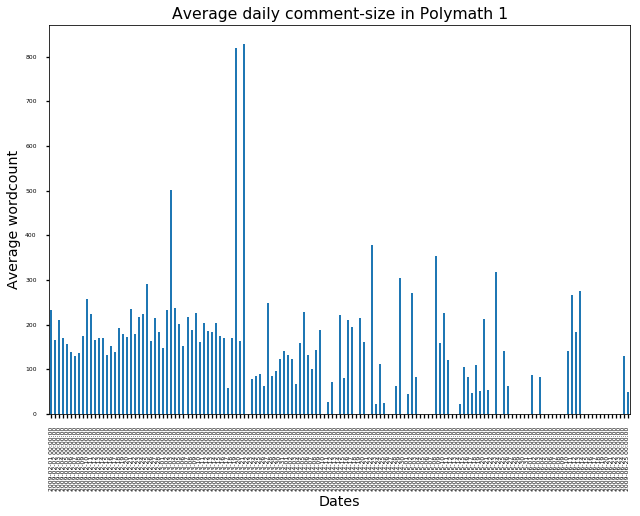

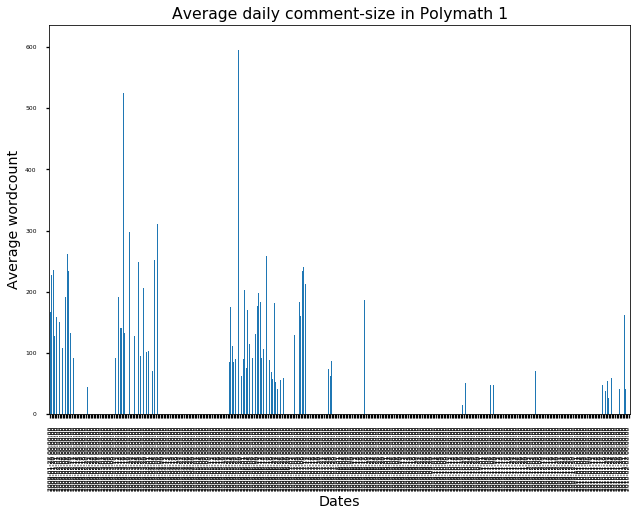

In [25]:
plot_comment_sizes(PM_FRAME, "Polymath 1", stage=-1, thread_type="research threads")
plot_comment_sizes(PM_FRAME, "Polymath 1", stage=-1, thread_type="discussion threads")

The grouping that arises from restricting our attention to research-threads is slightly different:

+ **Leaders (2):** Tao & Gowers
+ **Core-participants (8):** Ryan O'Donnel -> Sune Kristian Jakobsen  
+ **Periphery (53):** Croot -> Malkevitch

One general conclusion holds for both representations, namely that the group of core participants is rather heterogeneous. Indeed more so than the participants in the periphery. **(note: isn't this to be expected that those who participated to a larger number of projects have a higher chance to be less similar (given the metric we use)**

**More importantly:** What is considered as the periphery across all projects includes some central figures of individual projects. We discuss this explicitly w.r.t. Polymath 8, but it is also true for Polymaths 4 and 5 (e.g. Ernie Croot is one of the most prominent participants to Polymath 4).

The most prominent projects according to these data are Polymath 1, 5, and to a lesser extent 4. The largest project, namely Polymath 8, is less prominent, and clearly includes fewer highly active participants from the core community of participants we identified. This suggests that limiting our attention to participants to at least two projects leaves out important contributors to Polymath 8.

A scatter-plot of the same participation-data for all participants allows us to expand our scope without sacrificing legibility.

In [1]:
# assembling data on project-participatip
author_project_bool, _, select_1, *_ = project_participation_evolution(PM_FRAME, ALL_AUTHORS, n=1, research_only=True)
project_participation = author_project_bool.sum(axis=1)
authors_1 = sorted([author for author, bool in select_1.items() if bool])
author_counts,* _ = general_heatmap(PM_FRAME, ALL_AUTHORS, authors=authors_1, thread_level=False, 
                binary=False)
author_counts_mod = author_counts.replace(0, np.NaN)
comment_participation = author_counts_mod.mean()
df = pd.concat([project_participation, comment_participation], axis=1).dropna()
df.columns = ["number of projects participated", "avg comments per project participated"]

NameError: name 'project_participation_evolution' is not defined

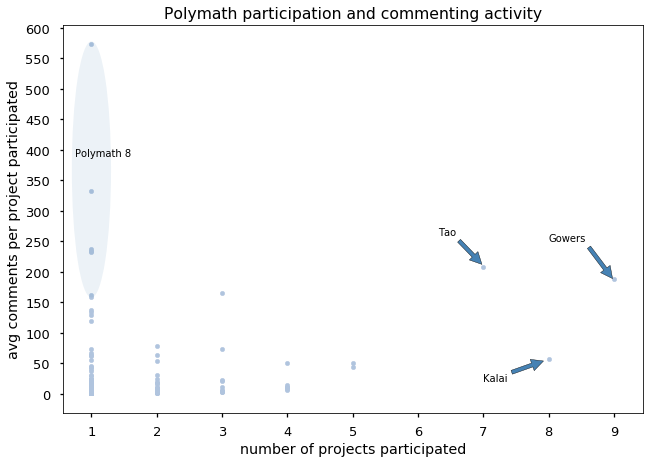

In [27]:
# plotting project-participation as scatter-plot
axes = plt.subplot()
axes.set_xticks(range(11));
axes.set_yticks(range(0, 700, 50));
axes.yaxis.set_ticks_position('left')
axes.xaxis.set_ticks_position('bottom')
axes.annotate('Gowers', xy=(9, 186), xytext=(8, 250),
            arrowprops=dict(facecolor='steelblue', shrink=0.05),
            )
axes.annotate('Kalai', xy=(7.95, 55), xytext=(7, 20),
            arrowprops=dict(facecolor='steelblue', shrink=0.05),
            )
axes.annotate('Tao', xy=(7, 210), xytext=(6.3, 260),
            arrowprops=dict(facecolor='steelblue', shrink=0.05),
            )
e = mpl.patches.Ellipse(xy=(1,368), width=.6, height=420, angle=0)
e.set_alpha(.1)
e.set_facecolor('steelblue')
axes.add_artist(e)
axes.annotate('Polymath 8', xy=(1.2, 400), xytext=(.75, 390))
df.plot(kind='scatter', x='number of projects participated', y='avg comments per project participated',
            color= 'lightsteelblue', ax=axes, title="Polymath participation and commenting activity");


The above figure displays for each author the number of projects (s)he participated to (X-axis) and the avergage number of comments made to each of these projects (excluding the projects with null participation). On a total of 465 identified (non-anonymous) participants, 402 contributed to only 1 project, 32 to 2 projects, 16 to 3 projects, 10 to 4 projects, 2 to 6 projects, 1 to 8 projects, and 2 to 9 projects.

If we exclude the core-participants, there does not appear to be any marked correleation between active participation to projects and continued participation. Additionally, we can identify a group of 7 participants that were extremely active (more than 150 comments) during only one project. Further inspection of the data revealed that 6 of these participated to Polymath 8. These data-points partially explain why the largest project is under-represented in the data that reveal overlaps between projects.

Now we limit this

### TO DO

+ check if mean takes into account projects with zero participation (current version averages over threads with actual participation by replacing 0 comments by NaN)
+ "by thread" would give more balanced result since participation to large projects would give higher number of comments
+ consider "participated in at least n projects" as an alternative
+ try to use box-plots as well (per number of participations)

At the same time, because Polymath 8 is almost twice as large as the second largest project, these higher averages should not be taken as an indication that Polymath 8 participants were more active participants. A focus on the level of threads can reduce the size-effect of larger projects, since the variation in the size of threads (mean of 80 and std of 52, which gives a coeffient of variation of 0.65) is smaller than the variation in the size of projects (mean of 993 and std of 1175, which gives a coefficient of variation of 1.18). **Is the variation then really smaller? maybe it's just "above the mean" that projects show less variation...**

In [28]:
# assembling data on thread-participation
thread_data, *_ = general_heatmap(PM_FRAME, ALL_AUTHORS, authors=None, binary=False, thread_level=True,
                    binary_method='average', method='ward')
thread_data = thread_data.T
thread_bool = thread_data != 0
thread_bool_sum = thread_bool.sum(axis=1)
thread_data_mean = thread_data.replace(0, np.NaN)
thread_data_mean = thread_data_mean.mean(axis=1)
df_threads = pd.concat([thread_bool_sum, thread_data_mean], axis=1)
df_threads.columns = ["number of threads participated", "avg comments per thread participated"]

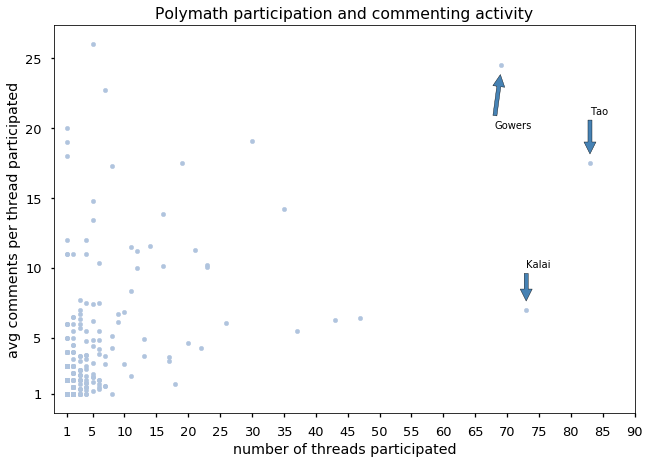

In [29]:
# plotting thread-participation as scatter-plot
axes = plt.subplot()
axes.set_xticks([1] + list(range(5,110,5)));
axes.set_yticks([1]+ list(range(5, 30, 5)));
axes.set_xlim(-1, 90);
axes.yaxis.set_ticks_position('left')
axes.xaxis.set_ticks_position('bottom')
axes.annotate('Gowers', xy=(69, 24), xytext=(68, 20),
            arrowprops=dict(facecolor='steelblue', shrink=0.05),
            )
axes.annotate('Kalai', xy=(73, 7.5), xytext=(73, 10),
            arrowprops=dict(facecolor='steelblue', shrink=0.05),
            )
axes.annotate('Tao', xy=(83, 18), xytext=(83, 21),
            arrowprops=dict(facecolor='steelblue', shrink=0.05),
            )
df_threads.plot(kind='scatter', x='number of threads participated', y='avg comments per thread participated',
            ax=axes, color= 'lightsteelblue', title="Polymath participation and commenting activity");
#df_threads.set_index('number of threads participated', inplace=True)
#df_threads.trendline.sort_index(ascending=False).plot(ax=axes);
#plt.gca().invert_xaxis()

The above scatter-plot displays average comments against participation, but now at the finer level of comment-threads (for a total of 137 comment-threads and the same 465 identified participants). Here too the core participants stand out. If we additionally take into account that the threads have on average 80 comments (min:1, 25% quantile: 37, 50% quantile: 91, 75% quantile: 108, max: 416), the dominant presence of Gowers and Tao can hardly be missed. Since we focus on threads instead of on projects, larger projects like Polymath 8 have, at this level of analysis, a less marked effect. Overall, the area with up to 5 comments per thread and up to 10 threads is the most populated with 403 out of 465 participants (87%; approximately the same as the number of participants that took part in only one project). Participation to only a few threads does not exclude active participation, but participation to more threads makes low participation less likely. A closer examination of the data confirms that the top-left part of the plot is no longer restricted to participants to Polymath 8, as we found for the project-level data.

In [30]:

GRAPH_DATA = DataFrame({'research': get_last(PM_FRAME, "research threads")[0]['research threads', 'network'],
                        'discussion': get_last(PM_FRAME, "discussion threads")[0]['discussion threads', 'network'],
                        'all': get_last(PM_FRAME, "all threads")[0]['all threads', 'network']})

def get_graph(netw, netw_type='i_graph'):
    try:
        out = getattr(netw, netw_type)
    except AttributeError:
        out = np.nan
    return out

GRAPH_DATA["research interaction graph"] = GRAPH_DATA["research"].apply(get_graph)
GRAPH_DATA["research cluster graph"] = GRAPH_DATA["research"].apply(partial(get_graph, netw_type='c_graph'))
GRAPH_DATA["discussion interaction graph"] = GRAPH_DATA["discussion"].apply(get_graph)
GRAPH_DATA["discussion cluster graph"] = GRAPH_DATA["discussion"].apply(partial(get_graph, netw_type='c_graph'))
GRAPH_DATA["interaction graph"] = GRAPH_DATA["all"].apply(get_graph)
GRAPH_DATA["cluster graph"] = GRAPH_DATA["all"].apply(partial(get_graph, netw_type='c_graph'))
GRAPH_DATA = GRAPH_DATA[["interaction graph", "research interaction graph", "discussion interaction graph",
                         "cluster graph", "research cluster graph", "discussion cluster graph"]]
GRAPH_DATA.index = GRAPH_DATA.index.droplevel(1)
GRAPH_DATA = GRAPH_DATA.groupby(GRAPH_DATA.index).last()
GRAPH_DATA = GRAPH_DATA.reindex(['Polymath {}'.format(i) for i in range(1, 12)])

In [31]:
def safe_netw_fun(graph, measure=None, pre_process=None, weight="weight"):
    if pre_process:
        pre_process = methodcaller(pre_process)
        graph=pre_process(graph)
    try:
        out = measure(graph, weight=weight)
    except:
        out = np.nan
    return out

avg_clustering = partial(safe_netw_fun,
                         measure=nx.average_clustering,
                         pre_process="to_undirected")

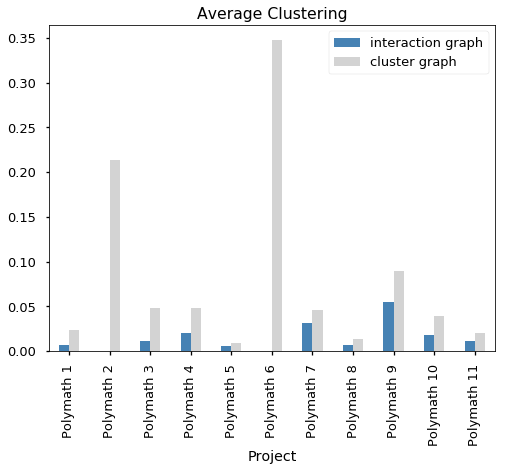

In [32]:
axes = GRAPH_DATA[['interaction graph', 'cluster graph']].applymap(
        avg_clustering).plot(kind='bar', figsize=(8,6), colors=["steelblue", "lightgray"])
axes.xaxis.set_ticks_position('bottom')
axes.yaxis.set_ticks_position('left')
axes.set_title("Average Clustering");

In [33]:
comments = get_last(PM_FRAME, "all threads")[0]['all threads', 'number of comments (accumulated)']
participants = get_last(PM_FRAME, "all threads")[0]['all threads', 'authors (accumulated)'].apply(len)

comments.index = comments.index.droplevel(1)
participants.index = participants.index.droplevel(1)

COMPARE = DataFrame({'cluster_avg': GRAPH_DATA['interaction graph'].apply(avg_clustering),
                     'transitivity': GRAPH_DATA['interaction graph'].apply(nx.transitivity),
                     'comments': comments,
                     'participants': participants})

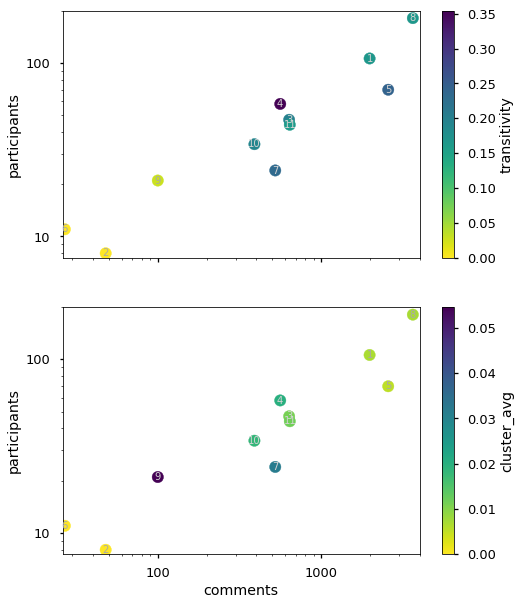

In [34]:
fig, axes = plt.subplots(2,1, figsize=(8,10))

COMPARE.plot(kind="scatter", x="comments", y="participants", c="transitivity", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=True,
             ax=axes[0])
COMPARE.plot(kind="scatter", x="comments", y="participants", c="cluster_avg", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[1])

for i in range(2):
    axes[i].set_ylim([0, 200]);
    axes[i].set_xlim([0, 4000]);
    axes[i].xaxis.set_ticks_position('bottom')
    axes[i].yaxis.set_ticks_position('left')
    axes[i].xaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    axes[i].yaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    for label, coords in COMPARE.iterrows():
        if i == 0 and coords['transitivity'] < 0.06:
            color = "darkgray"
        elif i == 1 and coords['cluster_avg'] < 0.008:
            color = "darkgray"
        else:
            color = "lightgray"
        axes[i].text(coords['comments'], coords['participants'], label.split()[-1],
                     verticalalignment='center', horizontalalignment='center', color=color)


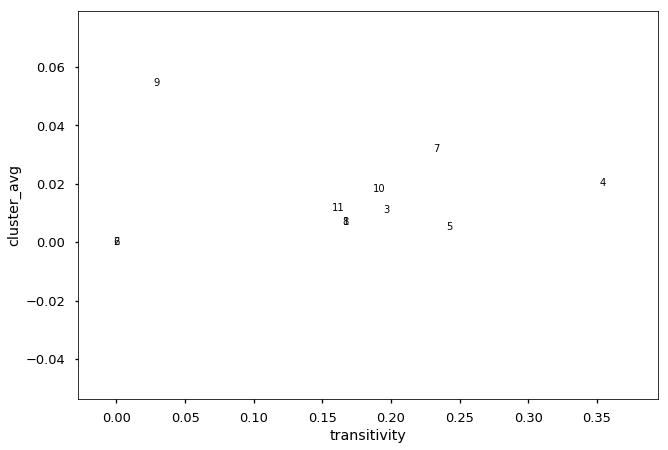

In [35]:
fig, axes = plt.subplots(1,1)
COMPARE.plot(kind="scatter", x="transitivity", y="cluster_avg", c="white", 
            s=COMPARE['participants'] * 10,
            logx=False, logy=False,
            sharex=False,
            ax=axes)

for label, coords in COMPARE.iterrows():
        axes.text(coords['transitivity'], coords['cluster_avg'], label.split()[-1],
                     verticalalignment='center', horizontalalignment='center', color="k")

In above plot, transitivity accords more importance to high-degree nodes, whereas local cluser avg accords more importance to low degree nodes.
**note: these measures do not seem to account for weights**

**ToDo** Do paths of more than 1 really matter? (in general few components seem to have a large diameter)

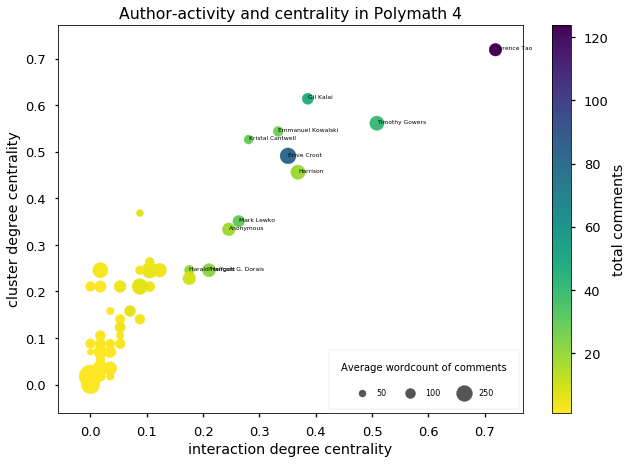

In [36]:
plot_scatter_authors(PM_FRAME, "Polymath 4", thresh=15, measure="degree centrality")

# Investigating individual projects


Projects can be studied from the following perspectives:

1. General features of a project, like the speed at which it grows, or the distribution of commenting-activity between the different threads.
2. A network-perspective on the relevant contributors, and either taking into account direct interactions, or co-presence in episodes (cfr. Section 4).
3. A quantitative perspective based on the number of contributions of each participant, possibly split up between threads, or between levels of comments.

We illustrate these by reconsidering Polymath 1.

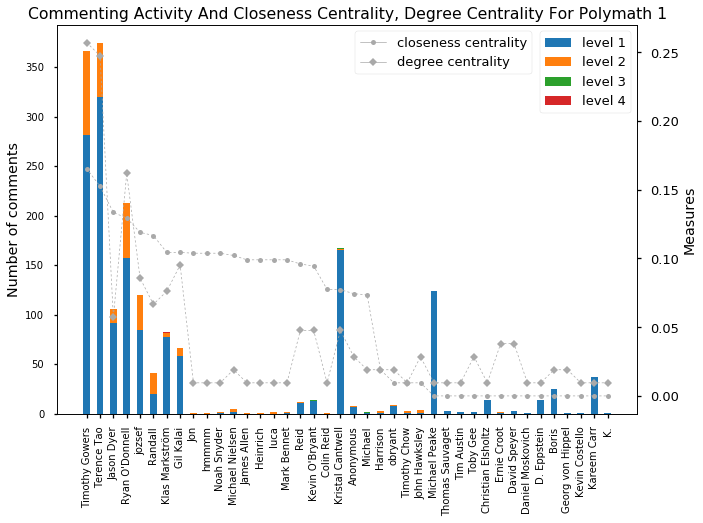

In [37]:
plot_activity_degree(PM_FRAME, "Polymath 1", measures=["closeness centrality", "degree centrality"],
                     delete_on=1, thresh=0.005, fontsize=10)

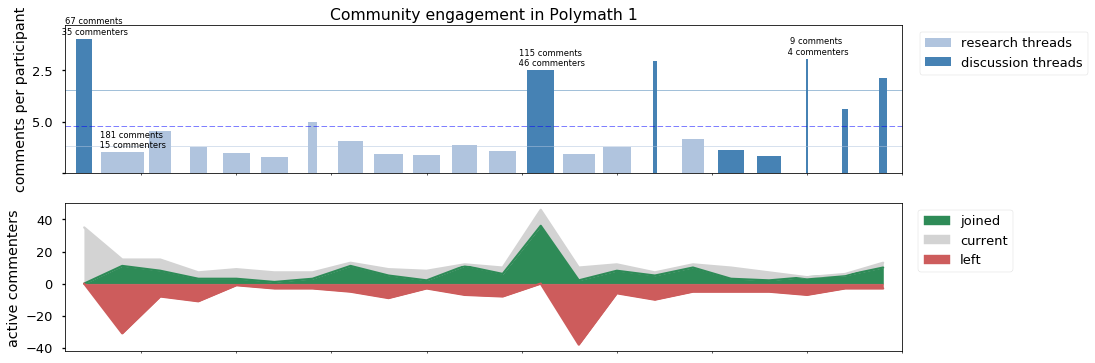

In [39]:
plot_thread_evolution(PM_FRAME, "Polymath 1", compress=160, sel=[1, 2, 13, 20], sharex=True)

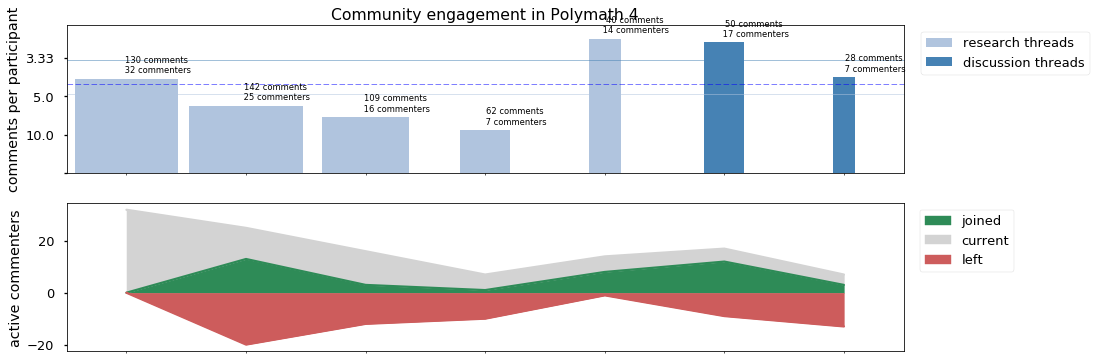

In [40]:
plot_thread_evolution(PM_FRAME, "Polymath 4", compress=150, sel=range(1,8), sharex=True)

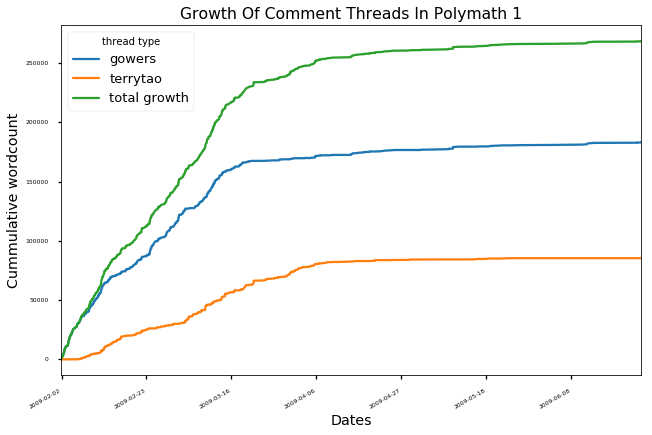

In [41]:
plot_growth(PM_FRAME, 'Polymath 1', thread_type='research threads')

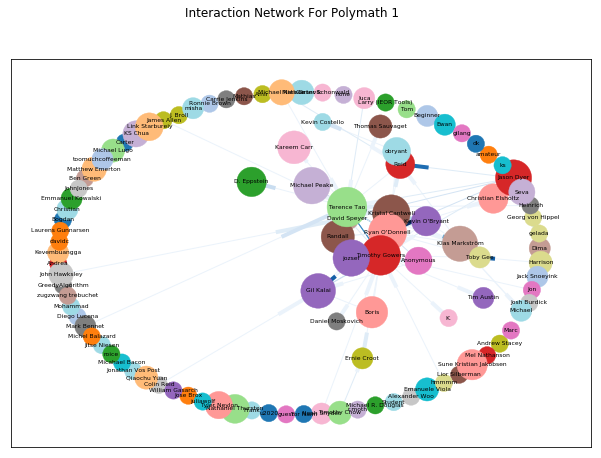

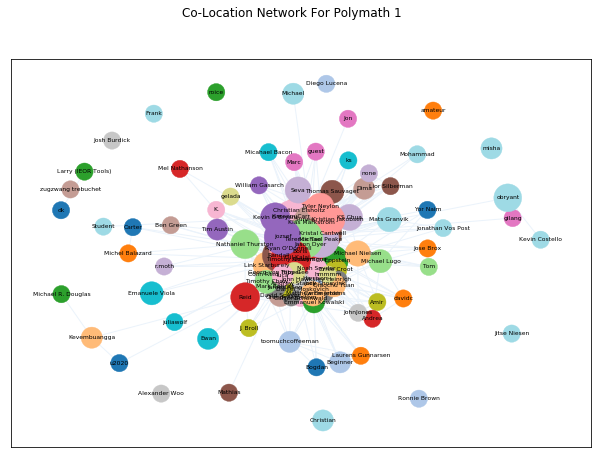

In [42]:
draw_network(PM_FRAME, "Polymath 1", graph_type='interaction', reset=True)
draw_network(PM_FRAME, "Polymath 1", graph_type='cluster', reset=True)

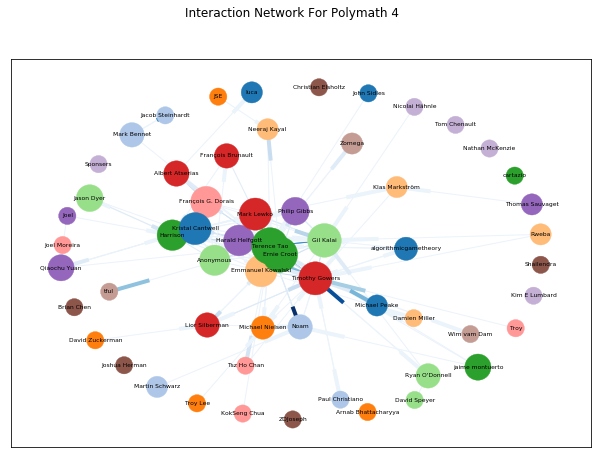

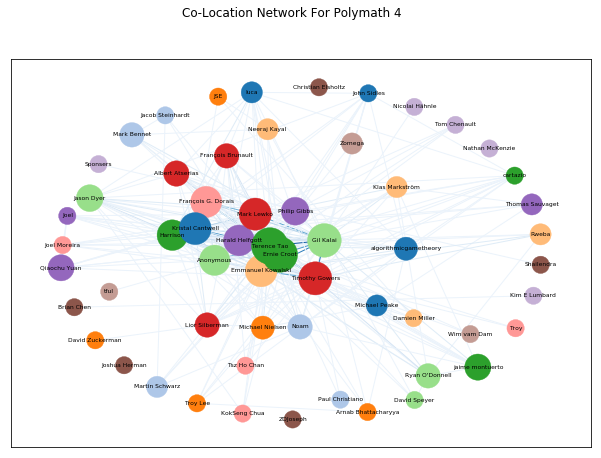

In [43]:
draw_network(PM_FRAME, "Polymath 4", graph_type='interaction', reset=True)
draw_network(PM_FRAME, "Polymath 4", graph_type='cluster', reset=False)

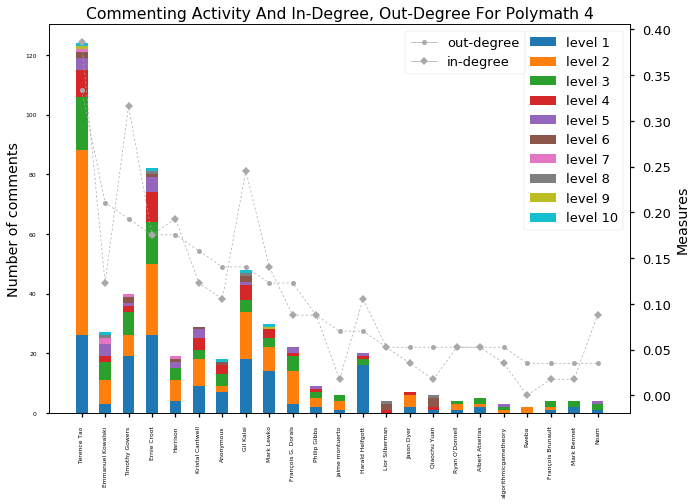

In [44]:
plot_activity_degree(PM_FRAME, "Polymath 4", measures=['in-degree', 'out-degree'], delete_on=0, thresh=.02)

Cophenetic Correlation Coefficient with average: 0.9800900519832988


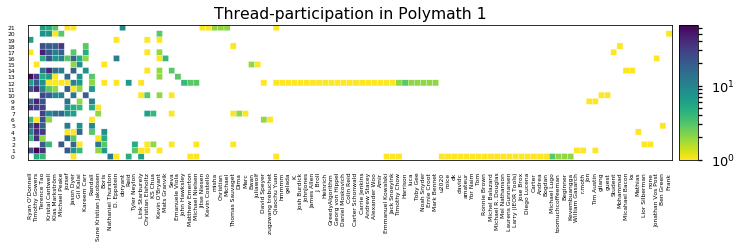

In [45]:
project_heatmap(PM_FRAME, "Polymath 1", cluster_threads=False, method='average', log=True, fontsize=6)

Cophenetic Correlation Coefficient with average: 0.9800900519832988


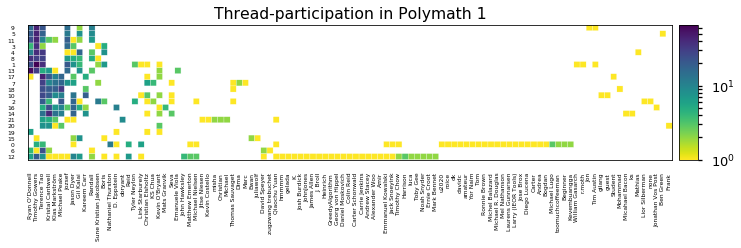

In [46]:
project_heatmap(PM_FRAME, "Polymath 1", cluster_threads=True, method='average', log=True, fontsize=6)

Cophenetic Correlation Coefficient with average: 0.9794230363651011


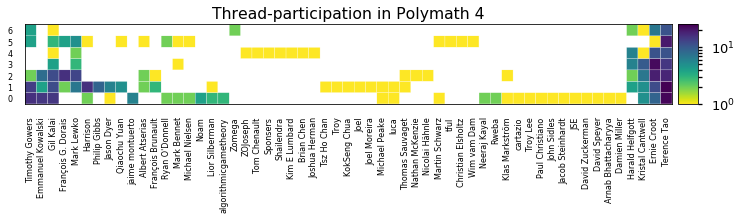

In [47]:
project_heatmap(PM_FRAME, "Polymath 4",
                cluster_threads=False,
                method='average',
                log=True,
                fontsize=8,
                binary=False)

Cophenetic Correlation Coefficient with average: 0.9812825690370358


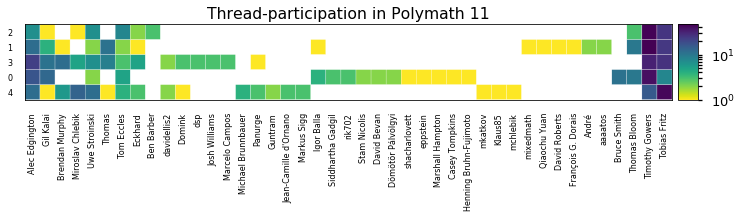

In [48]:
project_heatmap(PM_FRAME, "Polymath 11", cluster_threads=True, method='average', log=True, fontsize=8)

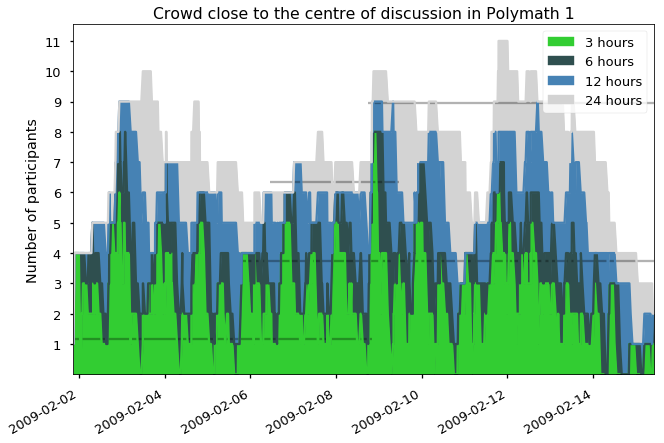

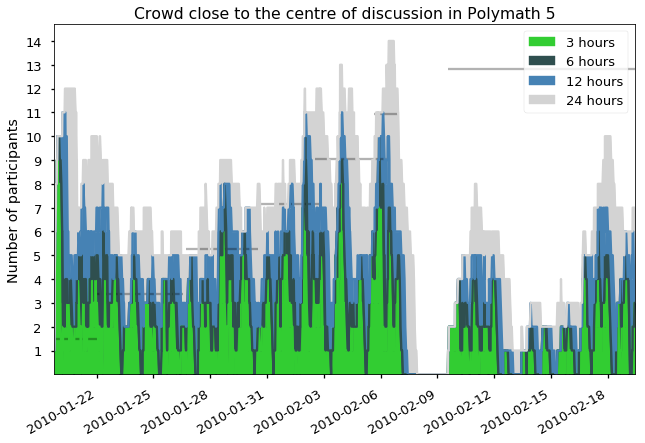

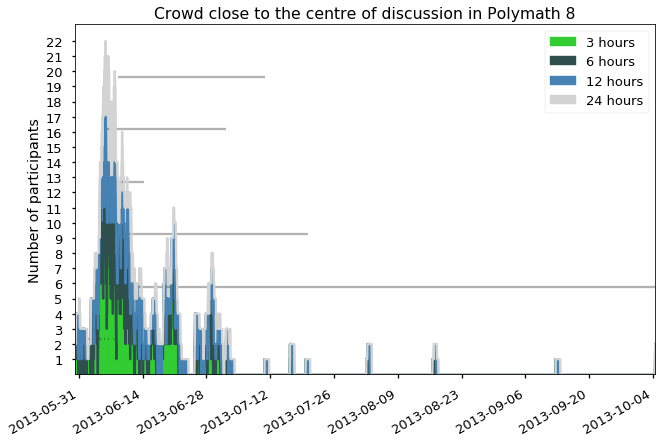

In [54]:
plot_centre_crowd(PM_FRAME, "Polymath 1", thread_type="research threads", stage=4, show_threads=True)
plot_centre_crowd(PM_FRAME, "Polymath 5", thread_type="research threads", stage=12, show_threads=True)
plot_centre_crowd(PM_FRAME, "Polymath 8", thread_type="research threads", stage=5, show_threads=True)

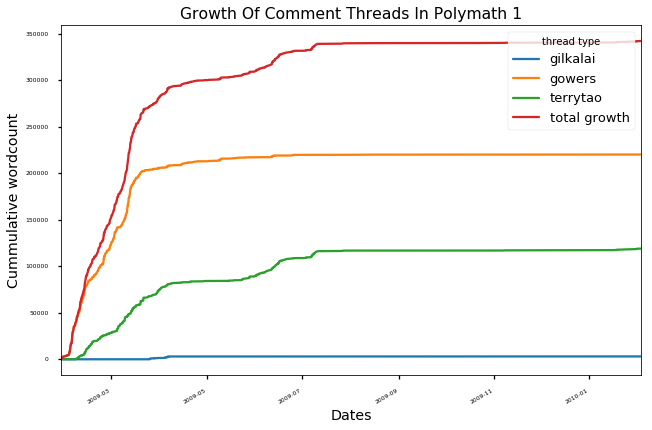

In [55]:
plot_growth(PM_FRAME, "Polymath 1")

Overriding thread_type and stage


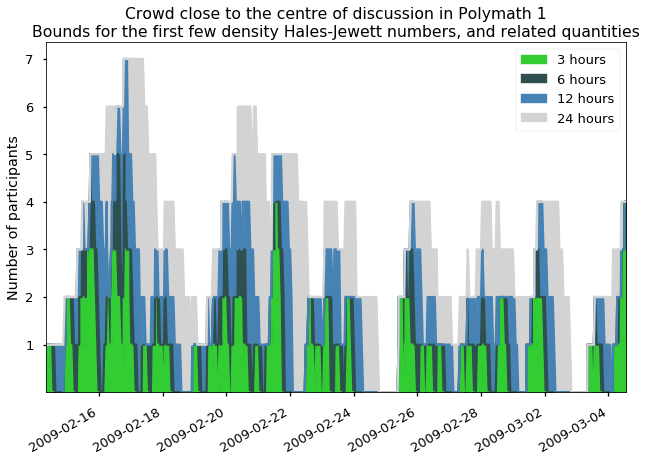

Overriding thread_type and stage


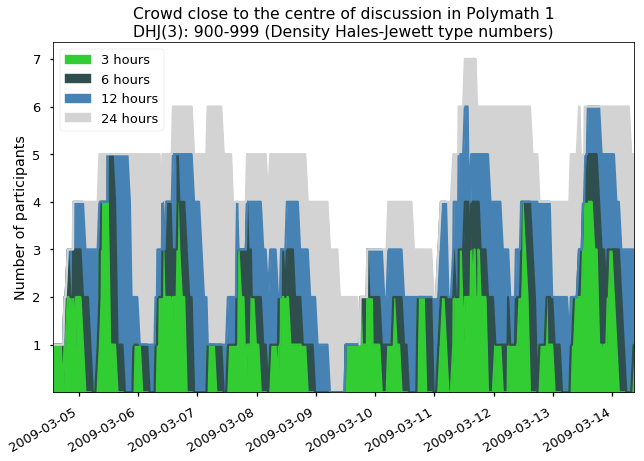

In [56]:
plot_centre_crowd(PM_FRAME, "Polymath 1", thread=7)
plot_centre_crowd(PM_FRAME, "Polymath 1", thread=10)

Overriding thread_type and stage


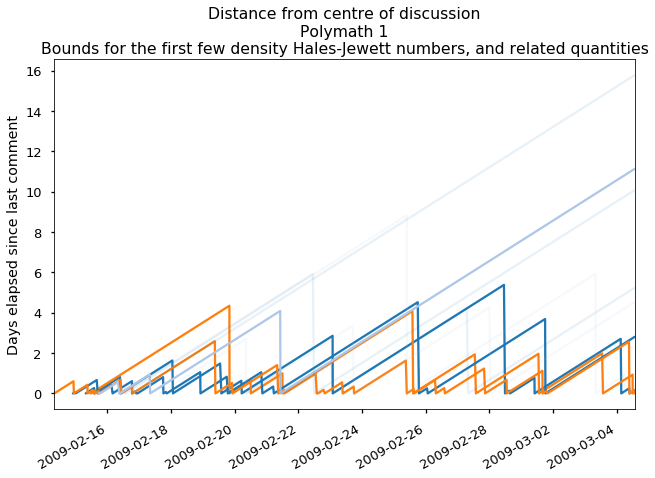

Overriding thread_type and stage


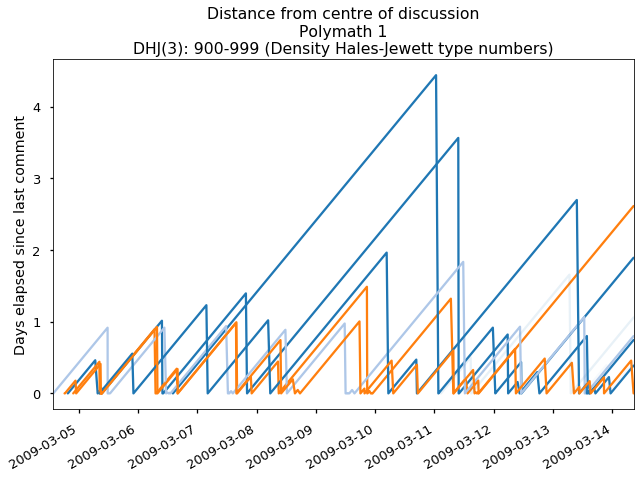

In [57]:
plot_distance_from_centre(PM_FRAME, "Polymath 1", thread=7, show_threads=False)
plot_distance_from_centre(PM_FRAME, "Polymath 1", thread=10, show_threads=False)

Overriding thread_type and stage


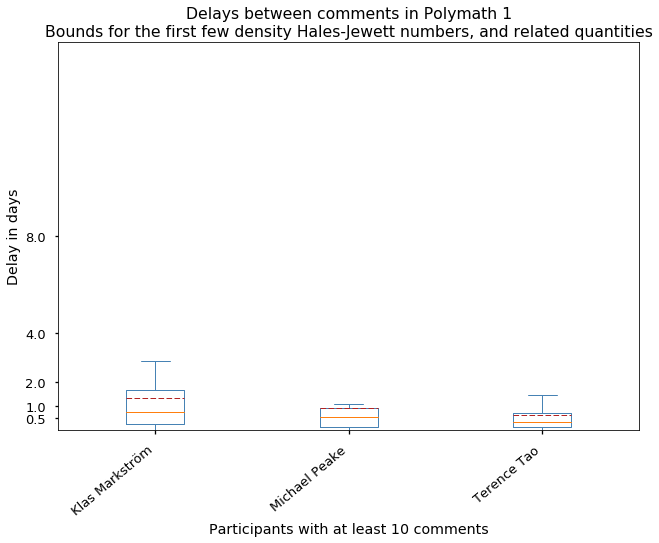

Overriding thread_type and stage


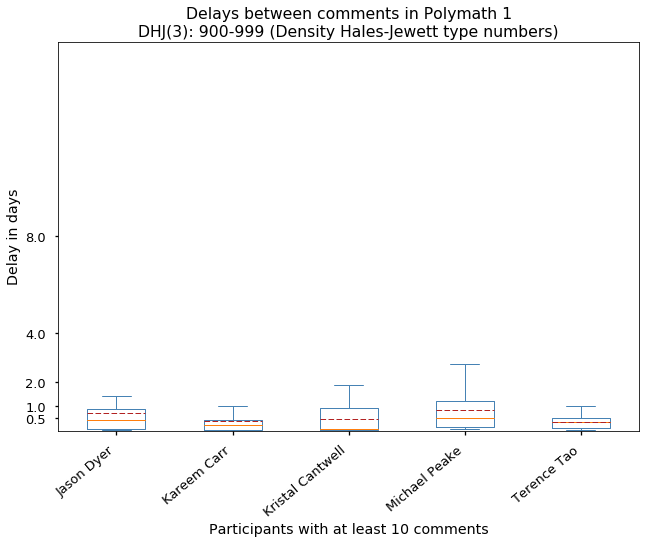

In [58]:
plot_delays_boxplot(PM_FRAME, "Polymath 1", thread=7)
plot_delays_boxplot(PM_FRAME, "Polymath 1", thread=10)

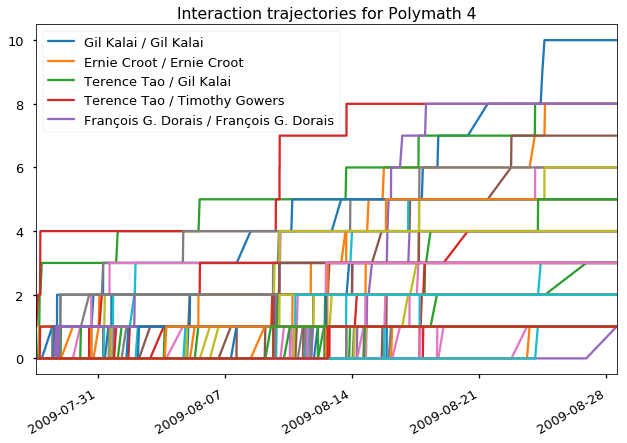

In [59]:
plot_interaction_trajectories(PM_FRAME, "Polymath 4", stage=2)#, thread=10)

In [ ]:
for i in range(10):
    try:
        plot_delays_boxplot(PM_FRAME, "Polymath 1", thread_type="research threads", thresh=20, stage=i)
    except:
        pass

### ToDo for heatmap below
+ need to check how this works again
+ look back into normalize
+ think though using same or different ordering
+ consider switching to undirected

In [ ]:
project, thread_type = "Polymath 4", "research threads"
method="ward"
graph_pm = get_project_at(PM_FRAME, project, thread_type, -1)['network'].i_graph
data_matrix = nx.to_numpy_matrix(graph_pm)
data = DataFrame(data_matrix, index=graph_pm.nodes(), columns=graph_pm.nodes())
row_linkage = linkage(data_matrix, method=method, metric='euclidean')
col_linkage = linkage(data_matrix.T, method=method, metric='euclidean')
c, _ = cophenet(row_linkage, pdist(data_matrix))
print("Cophenetic Correlation Coefficient for rows with {}: {}".format(method, c))
c, _ = cophenet(col_linkage, pdist(data_matrix.T))
print("Cophenetic Correlation Coefficient for columns with {}: {}".format(method, c))
row_order = dendrogram(row_linkage, no_plot=True)
col_order = dendrogram(col_linkage, no_plot=True)
data = data[[data.columns[i] for i in col_order['leaves']]]
data = data.reindex([data.index[i] for i in row_order['leaves']])

matplotlib.style.use(SBSTYLE)
fig, ax_heatmap = plt.subplots()
fontsize=6
# plot heatmap
heatmap = ax_heatmap.pcolor(data,
                            edgecolors='w',
                            cmap=mpl.cm.viridis_r,
                            norm=mpl.colors.LogNorm())
    
ax_heatmap.autoscale(tight=True)  # get rid of whitespace in margins of heatmap
ax_heatmap.set_aspect('equal')  # ensure heatmap cells are square
ax_heatmap.xaxis.set_ticks_position('bottom')  # put column labels at the bottom
ax_heatmap.tick_params(bottom='off', top='off', left='off', right='off')  # turn off ticks
ax_heatmap.set_title("{} interactions ({})".format(project, thread_type))
ax_heatmap.set_yticks(np.arange(0.5, len(data.index)+.5, 1))
ax_heatmap.set_ylabel("out")
ax_heatmap.set_yticklabels(data.index , fontsize=fontsize)
ax_heatmap.set_xticks(np.arange(len(data.columns)) + 0.5)
ax_heatmap.set_xlabel("in")
ax_heatmap.set_xticklabels(data.columns, rotation=90, fontsize=fontsize)
    
divider_h = make_axes_locatable(ax_heatmap)
cax = divider_h.append_axes("right", "3%", pad="1%")
plt.colorbar(heatmap, cax=cax)
        
lines = (ax_heatmap.xaxis.get_ticklines() +
         ax_heatmap.yaxis.get_ticklines())
plt.setp(lines, visible=False)
    
plt.tight_layout()


In [ ]:
pm4_netw = get_project_at(PM_FRAME, "Polymath 4", "research threads", -1)['network'].i_graph

In [ ]:
pm4_netw_noloops = pm4_netw.copy()
for node in pm4_netw_noloops.nodes():
    try:
        pm4_netw_noloops.remove_edge(node, node)
    except nx.NetworkXError:
        pass

In [ ]:
print(pm4_netw_noloops.size())
print(pm4_netw.size())

## Tasks and other topics

1. 

In [ ]:
plot_scatter_authors_hits(PM_FRAME, "Polymath 1")

In [ ]:
plot_centrality_measures(PM_FRAME, "Polymath 1", delete_on=0, thresh=0.01, fontsize=10,
                         measures=['degree centrality', 'closeness centrality', 'eigenvector centrality'])

## References

<div class="cite2c-biblio"></div>

## Appendix
### Overview of the threads
#### Research-threads

In [ ]:
PM_FRAME[PM_FRAME['basic', 'research']]['basic']

#### Discussion-threads

In [ ]:
PM_FRAME[~PM_FRAME['basic', 'research']]['basic']

### Identification of authors

The approach that was taken probably erred on the cautious side. **(Example: can we assume that HH, Harald and Harald Helfgott are the same?)**

In [ ]:
from access_classes import load_yaml
conversion = Series(load_yaml("author_convert.yaml")[0])
conversion

## Unused code (to be kept for later use)

In [ ]:
# code to make graph with projects as nodes and number of common participants as weighted edges
def series_of_participants(thread_type, lower=0):
    data = get_last(thread_type)[0][thread_type, 'comment_counter (accumulated)'].apply(Series)
    data.index = data.index.droplevel(1)
    mask = data.sum(axis=0) >= lower
    data = data[mask.index[mask]]
    out = {project: set(data.loc[project].dropna().index) for project in data.index}
    return Series(out)

def make_network(ser, network, edge_list, thresh):
    _, _, weights = zip(*edge_list)
    if max(weights) < thresh:
        raise ValueError("Thresh ({}) is higher than {}".format(thresh, max(weights)))
    edge_list = [(i,j, k) for (i,j,k) in edge_list if k > thresh]
    edge_dict = {(i,j): k for (i,j,k) in edge_list}
    df = DataFrame(index=ser.index, columns=ser.index)
    for (i,j) in edge_dict.keys():
        df[i][j] = edge_dict[(i,j)]
    df = df.fillna(0)
    network.add_nodes_from(ser.index)
    network.add_weighted_edges_from(edge_list)
    return network,df

def digraph_from_series_of_sets(ser, thresh=0):
    network = nx.DiGraph()
    edge_list = [(i, j, (len(ser[i] & ser[j]) / len(ser[i]))) for (i, j) in permutations(ser.index, 2)]
    return make_network(ser, network, edge_list, thresh=thresh)
    
def graph_from_series_of_sets(ser, absolute = False, thresh=0):
    network = nx.Graph()
    if absolute:
        edge_list = [(i, j, (len(ser[i] & ser[j]))) for (i, j) in combinations(ser.index, 2)]
    else:
        edge_list = [(i, j, (len(ser[i] & ser[j]) / min([len(ser[i]), len(ser[j])]))) for (i, j) in combinations(ser.index, 2)]
    return make_network(ser, network, edge_list, thresh=thresh)

lower=10
project_ser = series_of_participants('all threads', lower=lower)
project_network, project_matrix = graph_from_series_of_sets(project_ser, absolute=False, thresh=0)
project_nodes, project_sizes = project_ser.index.tolist(), project_ser.apply(len).tolist()
project_edges = project_network.edges()
project_weights = [project_network[source][dest]['weight']  for source, dest in project_edges]
maxWeight=float(max(project_weights))
project_colors = [plt.cm.Blues(weight/maxWeight) for weight in project_weights]

plt.ioff()
colors_unscaled=[tuple(map(lambda x: maxWeight*x, y)) for y in project_colors]
heatmap = plt.pcolor(colors_unscaled,cmap=plt.cm.Blues)
plt.ion()
fig,axes = plt.subplots()
nx.draw_networkx(project_network, nodelist=project_nodes,
                 edges=project_edges, node_size=project_sizes,
                 width=2, edge_color=project_colors, ax=axes)
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
plt.title("Proportion of common participants across Polymath-projects\n\
(with minimum of {} comments across all projects)".format(lower))

#add colorbar
cbar = plt.colorbar(heatmap)
cbar.ax.set_ylabel('weighted intersection of participants',labelpad=25,rotation=270);